## Funcional

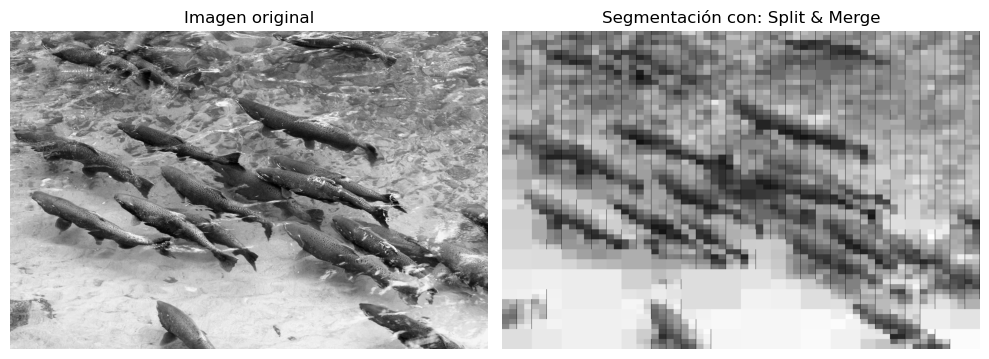

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
THRESHOLD = 300  # umbral de varianza para dividir (threshold)
MIN_SIZE = 16    # tamaño mínimo de región 
IMAGE_TEST = 'assets/salmon.jpg'

# Homogeneidad: varianza por debajo del umbral
def is_homogeneous(region):
    return np.var(region) < THRESHOLD

# División recursiva
def split(img, x, y, w, h):
    region = img[y:y+h, x:x+w]

    if w <= MIN_SIZE or h <= MIN_SIZE or is_homogeneous(region):
        return [(x, y, w, h)]
    
    w2, h2 = w // 2, h // 2
    regions = []
    regions += split(img, x, y, w2, h2)
    regions += split(img, x + w2, y, w2, h2)
    regions += split(img, x, y + h2, w2, h2)
    regions += split(img, x + w2, y + h2, w2, h2)
    return regions

# Fusión simple (por cercanía y valor medio)
def merge(img, regions):
    canvas = np.zeros_like(img)
    for x, y, w, h in regions:
        region = img[y:y+h, x:x+w]
        mean_val = int(np.mean(region))
        canvas[y:y+h, x:x+w] = mean_val
    return canvas


image = cv2.imread(IMAGE_TEST, cv2.IMREAD_GRAYSCALE)
h, w = image.shape

# Proceso de Split & Merge
regions = split(image, 0, 0, w, h)
segmented = merge(image, regions)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmentación con: Split & Merge")
plt.imshow(segmented, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## 